### Stock Market Prediction using LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544687,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556002,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451721,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439794,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.482606,447610800


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.871780,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.938187,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.325806,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.298737,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.721901,144114400


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        7.643214
1        7.656429
2        7.534643
3        7.520714
4        7.570714
          ...    
2510    71.000000
2511    71.067497
2512    72.477501
2513    72.449997
2514    72.879997
Name: Close, Length: 2515, dtype: float64

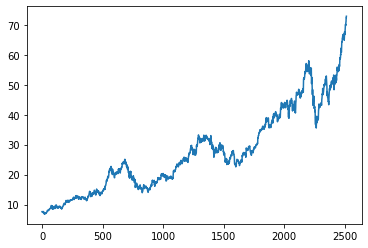

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0        7.643214
1        7.656429
2        7.534643
3        7.520714
4        7.570714
          ...    
2510    71.000000
2511    71.067497
2512    72.477501
2513    72.449997
2514    72.879997
Name: Close, Length: 2515, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.01187931]
 [0.01207948]
 [0.01023482]
 ...
 [0.99390352]
 [0.99348693]
 [1.        ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1634, 881)

In [ ]:
train_data

array([[0.01187931],
       [0.01207948],
       [0.01023482],
       ...,
       [0.24463511],
       [0.25050443],
       [0.25357165]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1533, 100)
(1533,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 246ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 2/100
24/24 [==============================] - 4s 187ms/step - loss: 5.7664e-04 - val_loss: 0.0012
Epoch 3/100
24/24 [==============================] - 4s 182ms/step - loss: 2.5203e-04 - val_loss: 0.0015
Epoch 4/100
24/24 [==============================] - 4s 187ms/step - loss: 2.2860e-04 - val_loss: 0.0012
Epoch 5/100
24/24 [==============================] - 4s 181ms/step - loss: 2.2258e-04 - val_loss: 0.0013
Epoch 6/100
24/24 [==============================] - 4s 181ms/step - loss: 2.1285e-04 - val_loss: 0.0015
Epoch 7/100
24/24 [==============================] - 4s 179ms/step - loss: 2.0962e-04 - val_loss: 0.0014
Epoch 8/100
24/24 [==============================] - 4s 180ms/step - loss: 1.9814e-04 - val_loss: 0.0012
Epoch 9/100
24/24 [==============================] - 4s 181ms/step - loss: 1.9990e-04 - val_loss: 0.0026
Epoch 10/100
24/24 [==============================] - 4s 1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.00738963355029

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

45.60163113375343

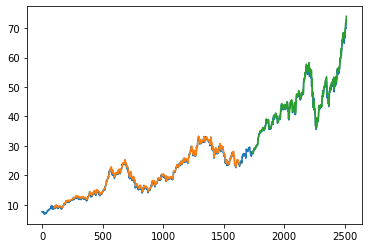

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()